In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 绘制小提琴图
def figure2_1():
    sns.violinplot(data=np.random.randn(200, 10) + np.random.randn(10))
    plt.xlabel('action')
    plt.ylabel('reward distribution')

figure2_1()

In [3]:
class Bandit:
    def __init__(self, kArm=10, epsilon=0., initial=0., stepSize=0.1, sampleAverage=False, 
                 UCBParam=None, gradient=False, gradientBaseline=False, trueReward=0.):
        self.k = kArm
        self.stepSize = stepSize
        self.sampleAverage = sampleAverage
        
        self.epsilon = epsilon
        self.qTrue = []
        self.qEst = np.zeros(self.k)
        self.actionCount = []
        self.indices = np.arange(self.k)
        
        # 初始化
        for i in range(self.k):
            self.qTrue.append(np.random.randn() + trueReward)
            self.qEst[i] = initial
            self.actionCount.append(0)
        
        self.bestAction = np.argmax(self.qTrue)
    
    def getAction(self):
        if self.epsilon > 0:
            if np.random.binomial(1, self.epsilon) == 1:
                return np.random.choice(self.indices)
        
        return np.argmax(self.qEst)
    
    def takeAction(self, action):
        reward = np.random.randn() + self.qTrue[action]
        self.actionCount[action] += 1
        
        if self.sampleAverage:
            self.qEst[action] += (reward - self.qEst[action])/self.actionCount[action]
        else:
            self.qEst[action] += self.stepSize * (reward - self.qEst[action])
        
        return reward   

In [4]:
def banditSimulation(nBandits, time, bandits):
    bestActionCounts = [np.zeros(time, dtype='float') for _ in range(len(bandits))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(len(bandits))]
    
    for banditInd, bandit in enumerate(bandits):
        for i in range(nBandits):
            for t in range(time):
                action = bandit[i].getAction()
                reward = bandit[i].takeAction(action)
                averageRewards[banditInd][t] += reward
                if action == bandit[i].bestAction:
                    bestActionCounts[banditInd][t] += 1
        bestActionCounts[banditInd] /= nBandits
        averageRewards[banditInd] /= nBandits
    return bestActionCounts, averageRewards

def epsilonGreedy(nBandits, time, style=0):
    epsilons = [0., 0.1, 0.01]
    bandits = []
    for i, eps in enumerate(epsilons):
        bandits.append([Bandit(epsilon= eps, sampleAverage=True) for _ in range(0, nBandits)])
    
    bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)
    
    if style == 0:
        for eps, counts in zip(epsilons, bestActionCounts):
            plt.plot(counts, label='epsilon = '+str(eps))
        plt.xlabel('Steps')
        plt.ylabel('% optimal action')
        plt.legend()

    if style == 1:
        for eps, rewards in zip(epsilons, averageRewards):
            plt.plot(rewards, label='epsilon = '+str(eps))
        plt.xlabel('Steps')
        plt.ylabel('average reward')
        plt.legend()

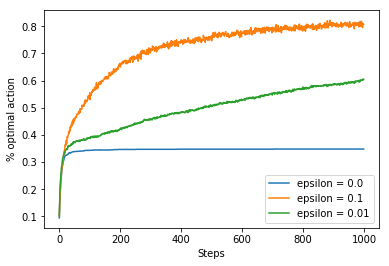

In [19]:
epsilonGreedy(2000, 1000, 0)

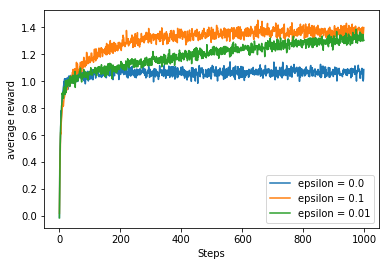

In [20]:
epsilonGreedy(2000, 1000, 1)

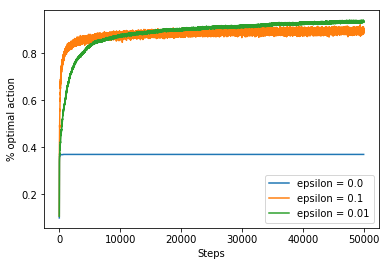

In [21]:
# exercise 2.3 which method will perform best in the long run?
epsilonGreedy(2000, 50000, 0)

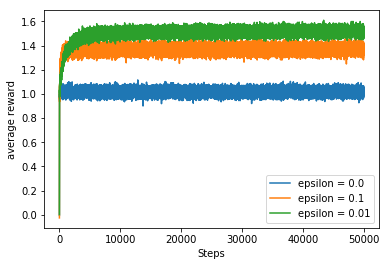

In [6]:
epsilonGreedy(2000, 50000, 1)

In [8]:
def optimisticInitialValues(nBandits, time):
    bandits = [[], []]
    bandits[0] = [Bandit(epsilon=0, initial=5, stepSize=0.1) for _ in range(nBandits)]
    bandits[1] = [Bandit(epsilon=0.1, initial=0, stepSize=0.1) for _ in range(nBandits)]
    bestActionCounts, _ = banditSimulation(nBandits, time, bandits)
    
    plt.plot(bestActionCounts[0], label='epsilon = 0, q = 5')
    plt.plot(bestActionCounts[1], label='epsilon = 0.1, q = 0')
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()

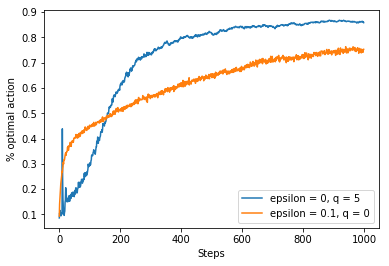

In [9]:
optimisticInitialValues(2000, 1000)